# Introduction

Every cell in the body is a direct descendant of the fertilized egg from which each of us developed. Through time the DNA sequence of every cell acquires a set of differences from its progenitor, this variations are called somatic mutations {stratton, yates}. All cancer arise as a result of a somatic mutation, so an approach to unveil the mysteries of cancer is through the catalogue of mutations a cancer genome has {stratton, zainalA}. 

Somatic mutations have been classified depending on certain characteristics, such as location,  mutations can occur all over the genome, that can be a simple way to determine if they will affect the protein structure and a basic approach to determine the functional impact the variation will have {lodish, tate, reva}. In cancer is important to classify mutations as the ones that have been positively selected or “driver” mutations, which confer an advantage to the cell and “passenger” mutations, this type haven't been selected, they just happened to be there {stratton, zainalA}.  

To understand cancer, several models have been developed, it has been seen as an evolutionary process, it is a series events, constant acquisition of mutations and natural selection, these processes mark the genome, and a cancer's life history is encrypted in the somatic mutations that we can find in its genome {lean, zainalB, yates}. 

Knowing the history of a tumor is important, because as in evolution, it lets us understand the subpopulations of cells present in a tumor and the biological processes, and can be used in a clinical decision {fisher}. In fact the catalogue of mutations have been used to tell the history of tumors, to reconstruct a phylogeny of the diverse clone subpopulations, which its being recognized to have value making clinical decisions {popic, ricketts}.

An important thing in history is time, knowing how long have been the tumor evolving can help in diagnosis, tumor classification, prognosis and treatment. Time can lead us to determine which pattern of mutation interactions, such as mutual exclusivity or co-occurrence is in action, which is especially important because such patterns help finding unknown functional interactions that might be important tumor classification and multi target treatment {ochoa}.

Studies show that the accumulation of mutations can be accelerated due to genome instability, increased sensitivity to mutagenic agents and breakdown of genomic maintenance {hanahan, negrini}, according to this we can make the assumption that the mutations present before the tumor started to evolve are negligible in number. 

The majority of molecular changes are caused by random fixation of selectively neutral mutants {kimura}, correspondingly in cancer the majority of mutations do not confer advantage, it means they are not detectable under selection {cannataro, piraino}. Knowing this we can assume passenger mutations are useful to determine the age of a tumor because most mutations in the cancer genome are of this kind.

As the evolutive history, the age of a tumor can be inferred from the catalogue of mutations, in this paper we will present a method to determine the age of a tumor in terms of the somatic mutations with low or no selection pressure present in the cancer genome. 

Various measurements that could help to determine the tumor age where performed in breast cancer mutation assessor analysis data \cite{data, reva}. Based on location that might have low or neutral functional impact, silent, intergenic regions and intron mutations where selected.

# Methods and Data:

Data: All data used in this paper is available on line at https://gdac.broadinstitute.org;  The dataset used in this paper is the BRCA-TP.maf.annotated {data} file of the breast invasive carcinoma. It can be found in the mutation analysis section, mutation assessor link, it opens a widow, look for "methods and data" title, on the download results drop down select analysis results, where the file mentioned before can be downloaded. This is a mutations annotation file (MAF), where each entry is a mutation and its characteristics, this file contains 76673 entries of 977 samples, for each mutation there are 356 variables. 

Data preprocess Data was subjected to an analysis under the scope of the project objectives to select the variables that could be used to determine the age of the tumor. From 356 variables, nine were selected. The variables selected helped us know different characteristics of the mutation including: location, classification and functional impact {reva}.

Some measurements based on the count of passenger mutations were performed. Variant classification was the selection criteria to determine the mutations as passenger, The measurements consisted on counting the occurrence of a certain type of mutation by sample. Based on the location of the mutation and the functional impact score (FIS) determined by \cite{reva}, we took the ones that might have low or neutral functional impact, from the classifications presented in Table.<br>

#### Tabla 1 <br>

|Mutation type | Effect | Predicted functional Impact|
| ------------ | ------ |--------------------------- | 
| Nonsense | Non-synonymous  | medium - high         |
| Missense | Non-synonymous  | neutral - low - high  |
| Silent   | Synonymous      | neutral - low         | 
| Nonstop  | Non-synonymous  | medium - high         |
| In frame indels  | Non-synonymous | medium - high | 
| Frame shift indels | Non-synonymous | medium - high | 
| Start codon indels | Affects translation | medium-high|
| Stop codon indels | Affects translation | medium-high|
| Splice site | Affects translation | medium - high |
| Intergenic regions | Non-coding | neutral - low |
| Intron | Non-coding  | neutral - low |
| De Novo start out of frame | Non-synonymous  | medium-high |
| De Novo start in frame | Non-synonymous | medium-high | 
| 5' Flank | Non-coding, gene expression | medium-high |
| 3' and 5' Untranscribed regions | Non-coding, gene expression | medium-high |

Silent, intergenic region, intron mutations, functional impact determined by mutation assessor was also reviewed, mutations with FIS lower than 1.9 were classified as polymorphic variants, which is neutral or low functional impact \cite{reva}. For each sample, which has a unique identification, the count for total, silent, intergenic region and intron mutations were performed with a python algorithm developed for this purpose. Analyzing the general description of the counts, see data general description, the mean of IGR and intron mutations are too low to compare appropriately with the rest of the measurements, for this reason the summation of IGR, intron and silent mutations was used as one measurement.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

In [40]:
# Importando el archivo .maf anotado (Obtenido de: http://firebrowse.org)
archivomaf = 'BRCA-TP.maf.annotated'
#encoding = "ISO-8859-1" (Se obtenia un error, se encontró que agregando esto, funciono)
mafData = pd.read_csv(archivomaf, sep='\t', encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (50,57,62,63,67,70,72,73,75,76,105,108,109,113,122,124,131,132,135,136,145,150,151,163,164,179,205,302,303,304,318,319,320,354) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data preprocess:

In [41]:
# Una copia de las columnas que quiero en un nuevo DataFrame:
mafToSort = mafData[['Hugo_Symbol', 'Chromosome', 'Variant_Classification',
       'Variant_Type', 'i_HGNC_LocusType', 'is_coding', 'patient',
       'MA_Func.Impact', 'MA_FI.score']].copy()

# Cambiandole el nombre de MA_Func.Impact a MA_Func_Impact y MA_FI.score a MA_FI_score:
mafToSort.columns = ['Hugo_Symbol', 'Chromosome', 'Variant_Classification',
       'Variant_Type', 'i_HGNC_LocusType', 'is_coding', 'patient',
       'MA_Func_Impact', 'MA_FI_score']

print('Mutaciones: ' + str(mafToSort.shape[0]) + ' Variables: ' + str(mafToSort.shape[1]))

# Organizando por identificación de paciente:
data_SortPatient = mafToSort.sort_values(['patient','Variant_Classification', 'i_HGNC_LocusType'])

# Los NaN van a ser '-'
data = data_SortPatient.fillna('0')

# Guardo el archivo: 
# Con las columnas que quiero
# Ordenado por: paciente, Variant Classification y locus type
data_SortPatient.to_csv('maf_OrdenadoxPaciente.txt', sep='\t', encoding='utf-8')
#data_SortPatient.describe()

Mutaciones: 76673 Variables: 9


In [42]:
print('Mutaciones: ' + str(mafData.shape[0]) + ' Variables: ' + str(mafData.shape[1]))

Mutaciones: 76673 Variables: 356


### Data process:

#### Medidas

+ m1: silent
+ m2: Intergenic Regions
+ m3: Introns
+ m4: neutral&low FI [Determinado por el score <1.9] (El impacto funcional solo está dado para Missense_Mutations)
+ m5: suma silent, intergenic e intrones

In [43]:
# Si se necesita cargar de nuevo el archivo:
maf = 'maf_OrdenadoxPaciente.txt'
data = pd.read_csv(maf, sep='\t')

In [44]:
dg = data.groupby('patient')
m = {'patient':0, 'mut tot':0, 'silent':0, 'igr':0, 'intron':0, 'low&neutral FI':0, 'Score_Menor':0}
Paciente = []
mut_tot = []
silent_mut = []
intergenic = []
intron_mut = []
suma_s_igr_int = []
lynfi = []
fisMen19 = []
l = 0
n = 0
ln = 0
smenor19=0

for (patient, Pgroup) in dg:
    #print('\n', patient, '\n')
    m['patient'] = patient
    m['mut tot'] = Pgroup.shape[0]
    #print('mut tot:',Pgroup.shape[0])
    vgg = Pgroup.groupby('Variant_Classification')
    fig = Pgroup.groupby('MA_Func_Impact')
    fis = Pgroup.groupby('MA_FI_score')
    for (Variant_Classification, Vgroup) in vgg:
        if Variant_Classification == 'Silent':
            m['silent'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification == 'IGR':
            m['igr'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification =='Intron':
            m['intron'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
            #print(Variant_Classification, ':', Vgroup.shape[0])
    for(MA_Func_Impact, Fgroup) in fig:
        if MA_Func_Impact == 'low' :
            l = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        if MA_Func_Impact == 'neutral':
            n = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        ln = l+n
        m['low&neutral FI'] = ln
        #print(MA_Func_Impact,':', Fgroup.shape[0]) 
    for(MA_FI_score, FSgroup) in fis:
        if float(MA_FI_score) <= 1.9 and float(MA_FI_score) > 1.9 :
            m['Score_Menor']=FSgroup.shape[0]
            
    tt = m['silent'] + m['igr'] + m['intron']     
    Paciente.append(m['patient'])
    mut_tot.append(m['mut tot'])
    silent_mut.append(m['silent'])
    intergenic.append(m['igr'])
    intron_mut.append(m['intron'])
    lynfi.append(m['low&neutral FI'])
    fisMen19.append(m['Score_Menor'])
    suma_s_igr_int.append(tt)

paraDf = {'Patient_Id': Paciente, 'Total_Mutations': mut_tot, 'Silent_Mutations': silent_mut, 'IGR_Mutations': intergenic,
         'Intron_Mut': intron_mut, 'Low_Neutral_FI': lynfi, 'Score_Menor': fisMen19 , 'Suma_S_IGR_IN': suma_s_igr_int}

medidas = pd.DataFrame(paraDf)
# Guardando los datos sacados a un archivo de texto.
medidas.to_csv('medidasxpaciente.txt', sep='\t', encoding='utf-8')

# Results

- m1 vs m2 (Silent Mutations vs. Intergenic Regions)
- m1 vs m3 (Silent mutations vs. Introns)
- m2 vs m3 (Intergenic Regions vs. Introns)
- m5 vs Total

In [45]:
medsOrden = medidas.sort_values(by=['Total_Mutations', 'Patient_Id'], ascending=False)

#### Tabla 2

In [46]:
print('General description of the data: ')
medsOrden.describe()

General description of the data: 


,IGR_Mutations,Intron_Mut,Low_Neutral_FI,Score_Menor,Silent_Mutations,Suma_S_IGR_IN,Total_Mutations
count,978.000000,978.000000,978.000000,978.0,978.000000,978.000000,978.000000
mean,1.672802,1.979550,26.853783,0.0,17.768916,21.421268,78.397751
std,2.261623,3.956984,94.000665,0.0,60.036408,62.745334,266.520793
min,0.000000,0.000000,2.000000,0.0,1.000000,3.000000,1.000000
25%,1.000000,1.000000,7.000000,0.0,5.000000,8.000000,24.000000
50%,1.000000,1.000000,12.000000,0.0,8.000000,11.000000,37.000000
75%,2.000000,2.000000,22.000000,0.0,14.000000,18.000000,65.000000
max,17.000000,40.000000,1883.000000,0.0,1051.000000,1108.000000,5278.000000


In [47]:
# Quite los nombres de los pacientes, para poder tratar todo como int
soloMeds = medsOrden[['IGR_Mutations', 'Intron_Mut', 'Low_Neutral_FI',
                      'Silent_Mutations', 'Suma_S_IGR_IN', 'Total_Mutations']].copy()

## Total mutations

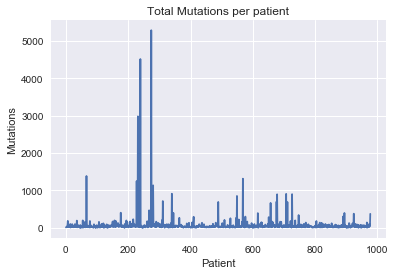

In [48]:
#x=np.arange(len(medsOrden))
#plt.bar(x, height = medsOrden.Total_Mutations)
plt.plot(mut_tot)
plt.title('Total Mutations per patient')
plt.ylabel('Mutations')
plt.xlabel('Patient')

In [49]:
# Zscore
z = np.abs(stats.zscore(soloMeds))
#print(z)

In [50]:
#Inter Quartile Range:
Q1 = soloMeds.quantile(0.25)
Q3 = soloMeds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IGR_Mutations        1.0
Intron_Mut           1.0
Low_Neutral_FI      15.0
Silent_Mutations     9.0
Suma_S_IGR_IN       10.0
Total_Mutations     41.0
dtype: float64


In [51]:
# sacando solo los que cumplen con el z-score:
soloMeds_out_z = soloMeds[(z < 3).all(axis=1) | (z > -3).all(axis=1)]
#print(soloMeds.shape)
#print(soloMeds_out_z.shape)

# sacando solo los que cumplen con el IQR:
soloMeds_out = soloMeds[~((soloMeds < (Q1 - 1.5 * IQR)) |(soloMeds > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(soloMeds.shape)
#print (soloMeds_out.shape)


# Los mas lindos de cada uno

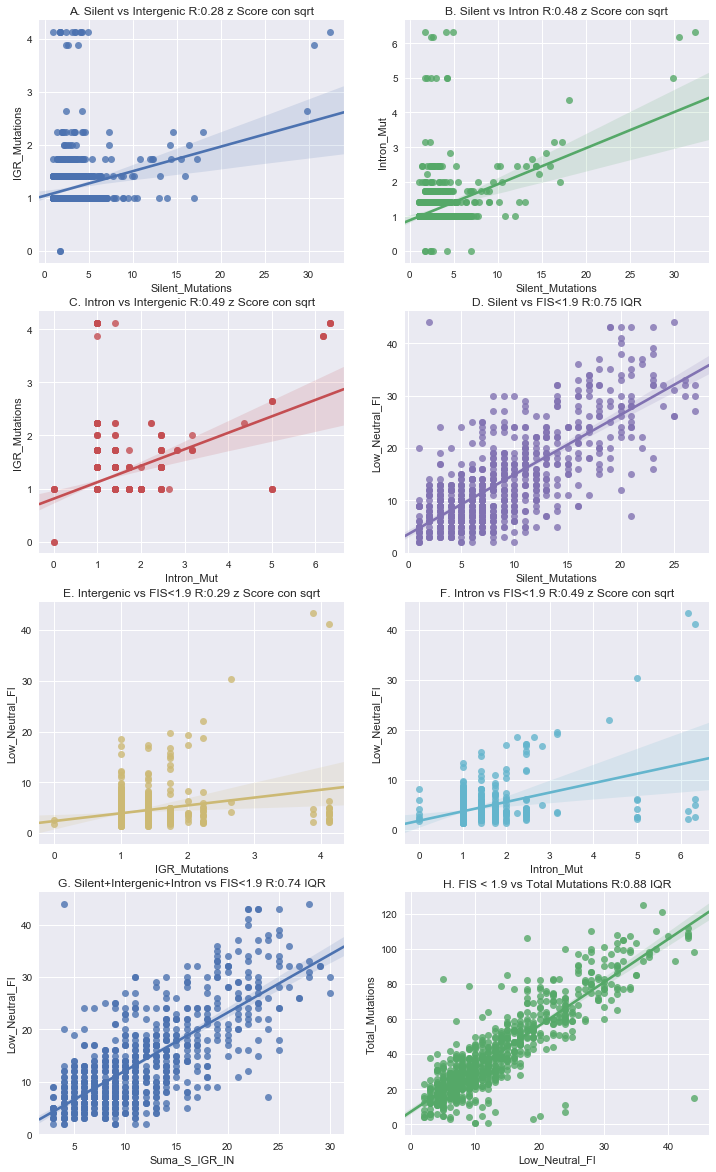

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(20.5)

cor1 = np.corrcoef(soloMeds_out_z.Silent_Mutations, soloMeds_out_z.IGR_Mutations)
cor1=cor1[0,1]
cor2 = np.corrcoef(soloMeds_out_z.Silent_Mutations,soloMeds_out_z.Intron_Mut)
cor2=cor2[0,1]
cor3= np.corrcoef(soloMeds_out_z.Intron_Mut, soloMeds_out_z.IGR_Mutations)
cor3=cor3[0,1]
cor4 = np.corrcoef(soloMeds_out.Silent_Mutations, soloMeds_out.Low_Neutral_FI)
cor4=cor4[0,1]
cor5=np.corrcoef(soloMeds_out_z.IGR_Mutations, soloMeds_out_z.Low_Neutral_FI)
cor5=cor5[0,1]
cor6=np.corrcoef(soloMeds_out_z.Intron_Mut, soloMeds_out_z.Low_Neutral_FI)
cor6=cor6[0,1]
cor7=np.corrcoef(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI)
cor7=cor7[0,1]
cor8=np.corrcoef(soloMeds_out.Low_Neutral_FI, soloMeds_out.Total_Mutations)
cor8=cor8[0,1]

tit1='A. Silent vs Intergenic R:'+str(round((cor1), 2)) + " z Score con sqrt"
tit2= 'B. Silent vs Intron R:' + str(round((cor2), 2)) + " z Score con sqrt"
tit3= 'C. Intron vs Intergenic R:' + str(round((cor3), 2)) + " z Score con sqrt"
tit4='D. Silent vs FIS<1.9 R:' + str(round((cor4), 2)) + " IQR"
tit5='E. Intergenic vs FIS<1.9 R:' + str(round((cor5), 2)) + " z Score con sqrt"
tit6='F. Intron vs FIS<1.9 R:' + str(round((cor6), 2)) + " z Score con sqrt"
tit7= 'G. Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2))  + " IQR"
tit8 = 'H. FIS < 1.9 vs Total Mutations R:' + str(round((cor8), 2)) +" IQR"


sns.regplot(np.sqrt(soloMeds_out_z.Silent_Mutations), np.sqrt(soloMeds_out_z.IGR_Mutations), ax=axs[0,0]).set_title(tit1)
sns.regplot(np.sqrt(soloMeds_out_z.Silent_Mutations),np.sqrt(soloMeds_out_z.Intron_Mut), ax=axs[0,1]).set_title(tit2)
sns.regplot(np.sqrt(soloMeds_out_z.Intron_Mut), np.sqrt(soloMeds_out_z.IGR_Mutations), ax=axs[1,0]).set_title(tit3)
sns.regplot(soloMeds_out.Silent_Mutations,soloMeds_out.Low_Neutral_FI, ax=axs[1,1]).set_title(tit4)
sns.regplot(np.sqrt(soloMeds_out_z.IGR_Mutations), np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[2,0]).set_title(tit5)
sns.regplot(np.sqrt(soloMeds_out_z.Intron_Mut), np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[2,1]).set_title(tit6)
sns.regplot(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI, ax=axs[3,0]).set_title(tit7)
sns.regplot(soloMeds_out.Low_Neutral_FI, soloMeds_out.Total_Mutations, ax=axs[3,1]).set_title(tit8)

Las graficas anteriores muestran la relación entre las diversas medidas luego de remover los outliers con el método que más se ajusta (segun las otras gráficas), se tienen dos posibles metodos: puntaje estandar (z-score) y la respectiva raíz cuadrada o el método del rango intercuartilico (IQR, por sus siglas en inglés), se menciona cual se uso en el titulo. <br>
__A.__ Relacion entre m1 y m2 (silent vs IGR), coeficiente de relación de 0.65, con el método z-score <br>
__B.__ Relación entre m1 y m3 (silent vs intron), coeficiente de relación (R) de 0.83, con el método z-score <br>
__C.__ Relación entre m2 y m3 (IGR vs intron), con un R de 0.62, con el método z-score <br> 
__D.__ Relación entre m1 y m5 (silent vs FIS < 1.9), R=0.75, con el método IQR <br>
__E.__ Relación entre m2 y m5 (IGR vs FIS < 1.9), R=0.66, método z-score <br>
__F.__ Grafica de relacion entre m3 y m5 (intron vs FIS < 1.9), R=0.84, método z-score<br>
__G.__ Relación m4 vs m5 (sum123 vs FIS < 1.9), R=0.74,  método IQR  <br>
__H.__ Relación entre FIS < 1.9 vs Mutaciones Totales, R=0.88,  método IQR 

In [53]:
sns.set()
#sns.palplot(sns.color_palette('bright'))
sns.set_palette(sns.color_palette('bright'))
sns.set_style("whitegrid")

# Results and discussion:

Various measurements that could help determine the tumor age where performed in breast cancer mutation assessor analysis data {data, reva}. Although all mutations can have an impact on the cell, the majority of them are neutral {liu}, so we can assume that the mutations that do not change the amino acid or are in a non coding region and  far from the gene control regions, have mostly low or neutral impact, looking that characteristics on Table 1, silent, intergenic regions, intron mutations and missense mutations with less than 1.9 functional impact score (FIS) {reva}, were selected as the ones with least impact, and to be used in the measurements to asses the tumor age.


__Relación m4 vs m5 (sum123 vs FIS < 1.9), R=0.74,  método z score con raiz cuadrada__  <br>

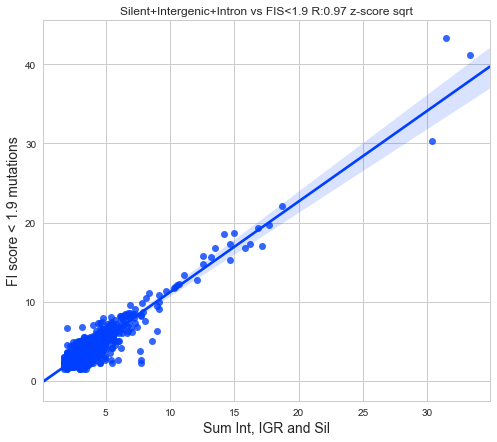

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(8)
fig.set_figheight(7)

cor7=np.corrcoef(soloMeds_out_z.Suma_S_IGR_IN, soloMeds_out_z.Low_Neutral_FI)
cor7=cor7[0,1]

#tit7= 'Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2)) + ' z-score sqrt'

sns.regplot(np.sqrt(soloMeds_out_z.Suma_S_IGR_IN), np.sqrt(soloMeds_out_z.Low_Neutral_FI))
plt.title('Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2)) + ' z-score sqrt')
plt.ylabel('FI score < 1.9 mutations', fontsize=14)
plt.xlabel('Sum Int, IGR and Sil', fontsize=14)
plt.savefig('FISSumazsr.png')

#print(cor7)

__Relación m4 vs m5 (sum123 vs FIS < 1.9), R=0.74,  método IQR__  <br>

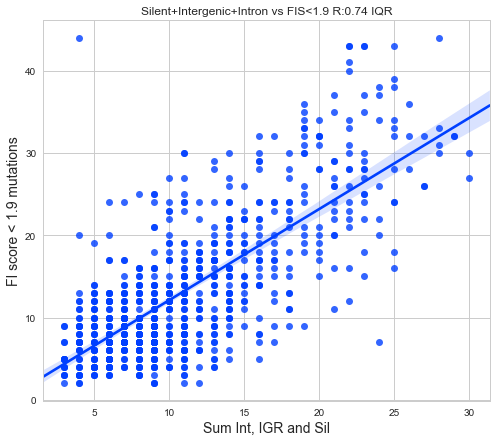

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(8)
fig.set_figheight(7)

cor7=np.corrcoef(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI)
cor7=cor7[0,1]
#tit7= 'Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2)) + " IQR"
sns.regplot(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI)
plt.title('Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2)) + " IQR")
plt.ylabel('FI score < 1.9 mutations', fontsize=14)
plt.xlabel('Sum Int, IGR and Sil', fontsize=14)


# Referencias

1. Stratton, M., Campell, P., Futreal, P.: The canger genome. Nature 485, 719{724 (2009)
2. Yates, L., Campbell, P.: Evolution of the cancer genome. Nature Reviews Genetics 13, 795{806 (2012)
3. Nik-Zainal, S., Alexandrov, L., Wedge, D., Van Loo, P., Greenman, C., Raine, K., et al: Mutational processes molding the genome of 21 breast cancers. Cell 149, 979{993 (2012)
4. Lodish, H., Berk, A., Zipursky, S., Matsudaira, P., Baltimore, D., Darnell, J.: Mutations: Types and causes. In: Tenney, S. (ed.) Molecular Cell Biology, 4th edn., pp. 53{76. W.H. Freeman and Company, New York (2000)
5. Tate, J., Bamford, S., Jubb, H., Sondka, Z., Beare, D., Bindal, N., et al: Cosmic: the catalogue of somatic mutations in cancer. Nucleic Acids Research 47, 941{947 (2019)
6. Reva, B., Antiipin, Y., Sander, C.: Predicting the functional impact of mutations: application to cancer genomics. Nucleic Acids Research 39 (2011)
7. Lean, C., Plutynski, A.: The evolution of failure: explaining cancer as an evolutionary process. Biology and philosophy 31, 39{57 (2015)
8. Nik-Zainal, S., Van Loo, P., Wedge, D., Alexandrov, L., Greenman, C., Wai Lau, K., et al
9. Fisher, R., Pusztai, L., Swanton, C.: Cancer heterogeneity: implications for targeted therapeutics. British journal of cancer 108, 479{485 (2013)
10. Popic, V., Salari, R., Hajirasouliha, I., Kashef-Haghighi, D., West, R., Batzoglou, S.: Fast and scalable inference of multi-sample cancer lineages. Genome Biology 16 (2015)
11. Ricketts, C., Popic, V., Toosi, H., Hajirasouliha, I.: Using lichee and bamse for reconstructing cancer phylogenetic trees. Current protocols in bioinformatics, 49 (2018). doi: 10.1002/cpbi.49
12. Ochoa, S., Martinez-Perez, E., Zea, D., Molina-Vila, M., Marino-Buslje, C.: Co-mutation and exclusion analysis in human tumors, a means for cancer biology studies and treatment design. Human mutation 40, 413{425 (2019)
13. Hanahan, D., Weinberg, R.: Halmarks of cancer: the next generation. Cell 144, 646{674 (2011)
14. Negrini, S., Gorgoulis, V., Halazonetis, T.: Genomic inestability an evolving hallmark in cancer. Nature Reviews Molecular Cell Biology 11, 220{228 (2010)
15. Kimura, M.: The neutral theory of molecular evolution: a review of recent evidence. The japanese journal of genetics 66, 367{386 (1991)
16. Cannataro, V., Townsed, J.: Neutral theory and the somatic evolution of cancer. Molecular biology and evolution 35, 1308{1315 (2018)
17. Piraino, S., Furney, S.: Beyond the exome: the role of non-coding somatic mutations in cancer. Annals of oncology 27, 240{248 (2016)
18. Institute, B., Center, T.G.D.A.: Mutation assessor. Broad Institute of MIT and Harvard (2016). doi:10.7908/C1F18Z2Z
19. Choi, Y., Sims, G., Murphy, S., Miller, J., Chan, A.: Predicting the functional effect of amino acid substitutions and indels. PLoS ONE, e46688 (2012). doi:10.1371/journal.pone.0046688
20. Azia, A., Uversky, V., Horovitz, A., Unger, R.: The effects of mutations on protein function: a comparative study of three databases of mutations in humans. Israel journal of chemistry 53, 217{226 (2013)
21. Liu, M., Watson, L., Zhang, L.: Classification of mutations by functional impact type: gain of function, loss of function, and switch of function. In: Basu, M., Pan, Y., Wang, J. (eds.) Bioinformatics Research and Applications, pp. 236{242 (2014). Springer, Cham

# Con IQR

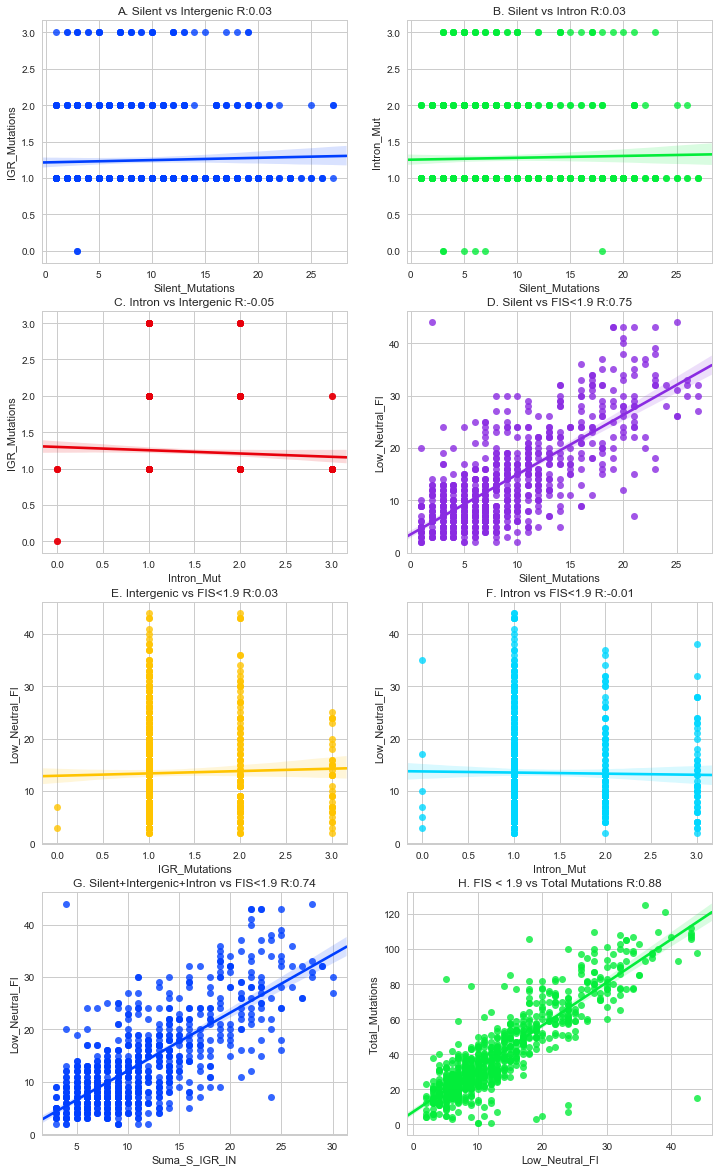

In [56]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(20.5)

cor1 = np.corrcoef(soloMeds_out.Silent_Mutations, soloMeds_out.IGR_Mutations)
cor1=cor1[0,1]
cor2 = np.corrcoef(soloMeds_out.Silent_Mutations,soloMeds_out.Intron_Mut)
cor2=cor2[0,1]
cor3= np.corrcoef(soloMeds_out.Intron_Mut, soloMeds_out.IGR_Mutations)
cor3=cor3[0,1]
cor4 = np.corrcoef(soloMeds_out.Silent_Mutations, soloMeds_out.Low_Neutral_FI)
cor4=cor4[0,1]
cor5=np.corrcoef(soloMeds_out.IGR_Mutations, soloMeds_out.Low_Neutral_FI)
cor5=cor5[0,1]
cor6=np.corrcoef(soloMeds_out.Intron_Mut, soloMeds_out.Low_Neutral_FI)
cor6=cor6[0,1]
cor7=np.corrcoef(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI)
cor7=cor7[0,1]
cor8=np.corrcoef(soloMeds_out.Low_Neutral_FI, soloMeds_out.Total_Mutations)
cor8=cor8[0,1]

tit1='A. Silent vs Intergenic R:'+str(round((cor1), 2))
tit2= 'B. Silent vs Intron R:' + str(round((cor2), 2))
tit3= 'C. Intron vs Intergenic R:' + str(round((cor3), 2))
tit4='D. Silent vs FIS<1.9 R:' + str(round((cor4), 2))
tit5='E. Intergenic vs FIS<1.9 R:' + str(round((cor5), 2))
tit6='F. Intron vs FIS<1.9 R:' + str(round((cor6), 2))
tit7= 'G. Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2))
tit8 = 'H. FIS < 1.9 vs Total Mutations R:' + str(round((cor8), 2))

sns.regplot(soloMeds_out.Silent_Mutations,soloMeds_out.IGR_Mutations, ax=axs[0,0]).set_title(tit1)
sns.regplot(soloMeds_out.Silent_Mutations,soloMeds_out.Intron_Mut, ax=axs[0,1]).set_title(tit2)
sns.regplot(soloMeds_out.Intron_Mut, soloMeds_out.IGR_Mutations, ax=axs[1,0]).set_title(tit3)
sns.regplot(soloMeds_out.Silent_Mutations,soloMeds_out.Low_Neutral_FI, ax=axs[1,1]).set_title(tit4)
sns.regplot(soloMeds_out.IGR_Mutations, soloMeds_out.Low_Neutral_FI, ax=axs[2,0]).set_title(tit5)
sns.regplot(soloMeds_out.Intron_Mut, soloMeds_out.Low_Neutral_FI, ax=axs[2,1]).set_title(tit6)
sns.regplot(soloMeds_out.Suma_S_IGR_IN, soloMeds_out.Low_Neutral_FI, ax=axs[3,0]).set_title(tit7)
sns.regplot(soloMeds_out.Low_Neutral_FI, soloMeds_out.Total_Mutations).set_title(tit8)

# Con sqrt de Z score

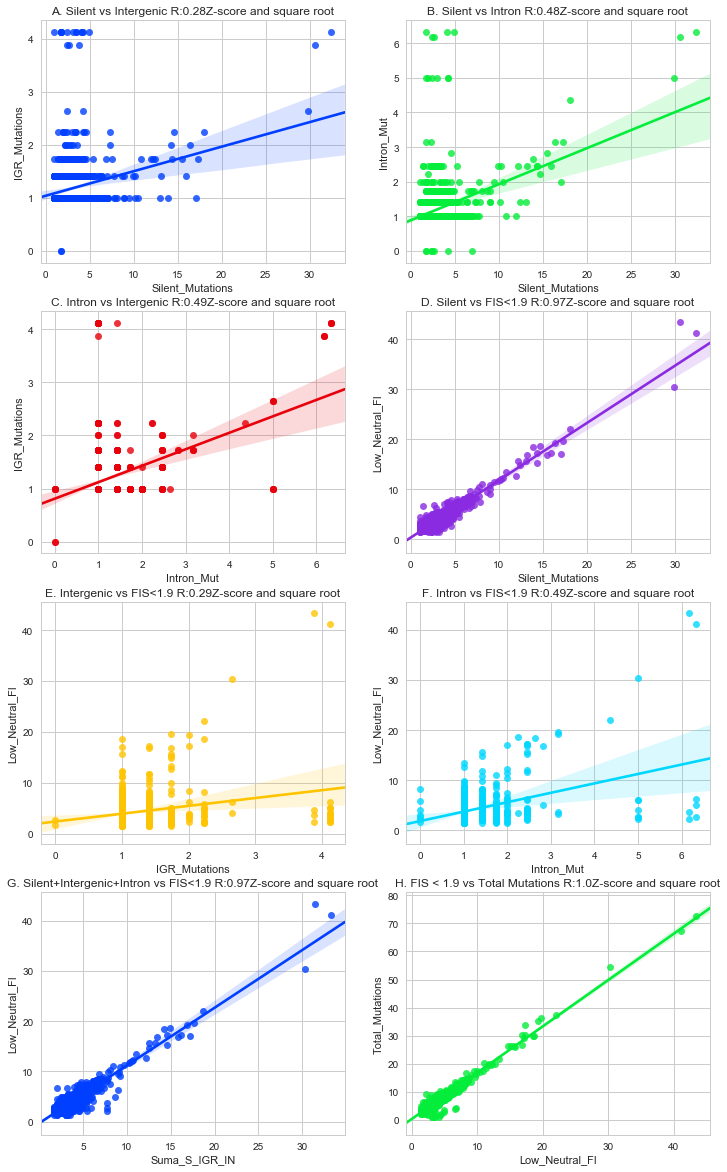

In [57]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(20.5)

cor1 = np.corrcoef(soloMeds_out_z.Silent_Mutations, soloMeds_out_z.IGR_Mutations)
cor1=cor1[0,1]
cor2 = np.corrcoef(soloMeds_out_z.Silent_Mutations,soloMeds_out_z.Intron_Mut)
cor2=cor2[0,1]
cor3= np.corrcoef(soloMeds_out_z.Intron_Mut, soloMeds_out_z.IGR_Mutations)
cor3=cor3[0,1]
cor4 = np.corrcoef(soloMeds_out_z.Silent_Mutations, soloMeds_out_z.Low_Neutral_FI)
cor4=cor4[0,1]
cor5=np.corrcoef(soloMeds_out_z.IGR_Mutations, soloMeds_out_z.Low_Neutral_FI)
cor5=cor5[0,1]
cor6=np.corrcoef(soloMeds_out_z.Intron_Mut, soloMeds_out_z.Low_Neutral_FI)
cor6=cor6[0,1]
cor7=np.corrcoef(soloMeds_out_z.Suma_S_IGR_IN, soloMeds_out_z.Low_Neutral_FI)
cor7=cor7[0,1]
cor8=np.corrcoef(soloMeds_out_z.Low_Neutral_FI, soloMeds_out_z.Total_Mutations)
cor8=cor8[0,1]

tit1='A. Silent vs Intergenic R:'+str(round((cor1), 2)) + 'Z-score and square root'
tit2= 'B. Silent vs Intron R:' + str(round((cor2), 2)) + 'Z-score and square root'
tit3= 'C. Intron vs Intergenic R:' + str(round((cor3), 2)) + 'Z-score and square root'
tit4='D. Silent vs FIS<1.9 R:' + str(round((cor4), 2)) + 'Z-score and square root'
tit5='E. Intergenic vs FIS<1.9 R:' + str(round((cor5), 2)) + 'Z-score and square root'
tit6='F. Intron vs FIS<1.9 R:' + str(round((cor6), 2)) + 'Z-score and square root'
tit7= 'G. Silent+Intergenic+Intron vs FIS<1.9 R:' + str(round((cor7), 2)) + 'Z-score and square root'
tit8 = 'H. FIS < 1.9 vs Total Mutations R:' + str(round((cor8), 2)) + 'Z-score and square root'

sns.regplot(np.sqrt(soloMeds_out_z.Silent_Mutations), np.sqrt(soloMeds_out_z.IGR_Mutations), ax=axs[0,0]).set_title(tit1)
sns.regplot(np.sqrt(soloMeds_out_z.Silent_Mutations),np.sqrt(soloMeds_out_z.Intron_Mut), ax=axs[0,1]).set_title(tit2)
sns.regplot(np.sqrt(soloMeds_out_z.Intron_Mut), np.sqrt(soloMeds_out_z.IGR_Mutations), ax=axs[1,0]).set_title(tit3)
sns.regplot(np.sqrt(soloMeds_out_z.Silent_Mutations),np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[1,1]).set_title(tit4)
sns.regplot(np.sqrt(soloMeds_out_z.IGR_Mutations), np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[2,0]).set_title(tit5)
sns.regplot(np.sqrt(soloMeds_out_z.Intron_Mut), np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[2,1]).set_title(tit6)
sns.regplot(np.sqrt(soloMeds_out_z.Suma_S_IGR_IN), np.sqrt(soloMeds_out_z.Low_Neutral_FI), ax=axs[3,0]).set_title(tit7)
sns.regplot(np.sqrt(soloMeds_out_z.Low_Neutral_FI),np.sqrt(soloMeds_out_z.Total_Mutations)).set_title(tit8)